In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)    # normal random numbers
    x[int(f * N):] += 5  # sum 5 to the (1-f)*N largest numbers
    return x

In [3]:
N = 1000
x = make_data(N)

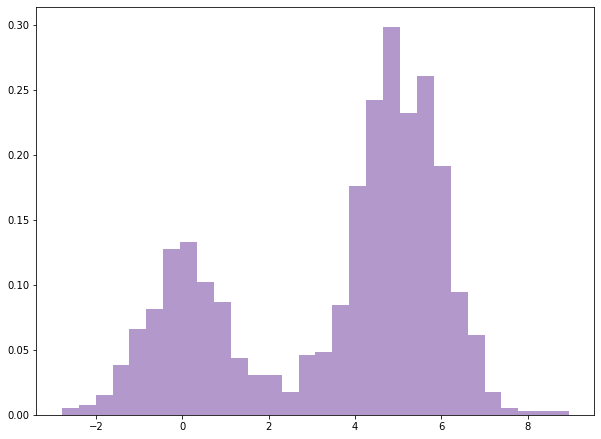

In [4]:
plt.figure(figsize=(10,7.5))
hist = plt.hist(x, bins=30, density=True, color='RebeccaPurple', alpha=0.5)
plt.show()

In [5]:
hist

(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <BarContainer object of 30 artists>)

In [6]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [7]:
widths

array([0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292])

In [8]:
# Estimacion de h optima
h_star = 1.06*np.std(x)/(N**(1/5))
h_star

0.6579157589270058

In [9]:
x_d = np.linspace(-4, 8, 1000)
density = 1/N*sum(norm(xi, h_star).pdf(x_d) for xi in x)

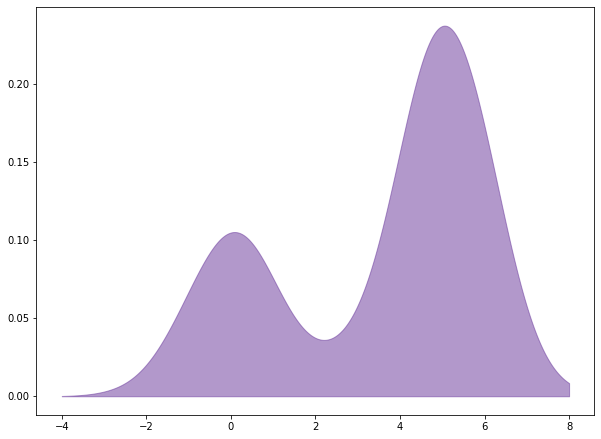

In [10]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_d, density, alpha=0.5, color='RebeccaPurple')

In [11]:
def kernel(h):
    x_d = np.linspace(-4, 8, 1000)
    density = 1/1000* sum(norm(xi, h).pdf(x_d) for xi in x)

    plt.figure(figsize=(10,7.5))
    plt.fill_between(x_d, density, alpha=0.5, color='RebeccaPurple')

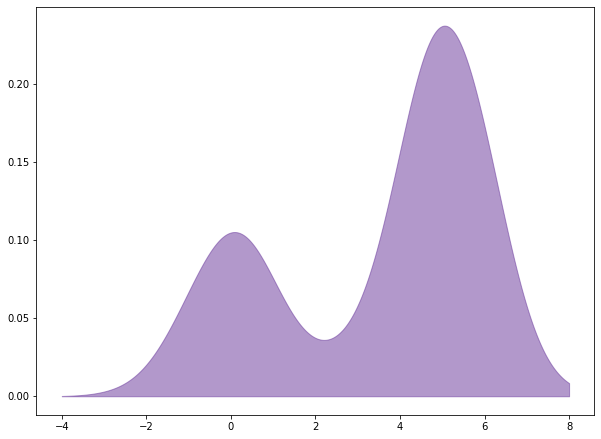

In [12]:
kernel(h_star)

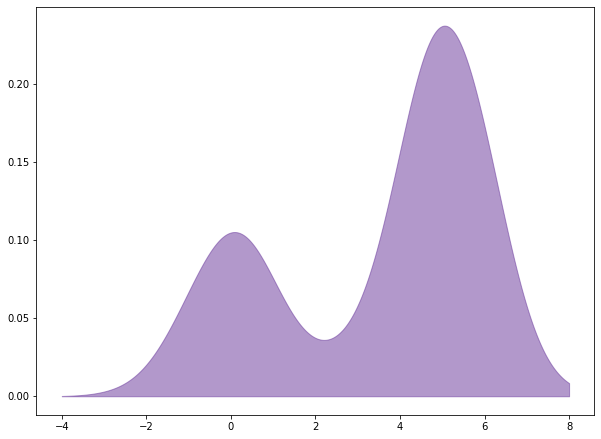

In [13]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=h_star, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.figure(figsize=(10,7.5))
plt.fill_between(x_d, np.exp(logprob), color='RebeccaPurple', alpha=0.5)

In [14]:
params = {'bandwidth': np.logspace(-1.5, 0.5, 100)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(x[:, None])

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.03162278, 0.03312852, 0.03470596, 0.03635851, 0.03808975,
       0.03990342, 0.04180345, 0.04379395, 0.04587923, 0.04806381,
       0.0503524 , 0.05274997, 0.0552617 , 0.05789303, 0.06064965,
       0.06353753, 0.06656291, 0.06973236, 0.07305272, 0.07653118,
       0.08017526, 0.08399287, 0.08799225, 0.09218207, 0.09657139,
       0.10116...
       0.65032629, 0.68129207, 0.7137323 , 0.7477172 , 0.78332032,
       0.82061871, 0.85969309, 0.90062802, 0.9435121 , 0.98843814,
       1.03550337, 1.08480964, 1.13646367, 1.19057724, 1.24726747,
       1.30665705, 1.36887451, 1.4340545 , 1.50233808, 1.57387304,
       1.64881419, 1.72732372, 1.80957154, 1.89573565, 1.98600253,
       2.08056754, 2.17963533, 2.2834203 , 2.39214708, 2.50605097,
       2.62537847, 2.75038784, 2.88134963, 3.01854726, 3.16227766])})

In [15]:
grid.best_estimator_

KernelDensity(bandwidth=0.3898603702549074)

In [16]:
grid.cv_results_.get('mean_test_score')

array([-591.66075125, -579.09349962, -567.64697528, -557.22125776,
       -547.72585267, -539.07873534, -531.20548227, -524.03849212,
       -517.51629045, -511.58290733, -506.18731374, -501.28290407,
       -496.82701706, -492.78049413, -489.10727958, -485.77407032,
       -482.75002102, -480.00650758, -477.51694684, -475.25666664,
       -473.20281801, -471.33432051, -469.63183148, -468.07773009,
       -466.65610646, -465.35274559, -464.15509601, -463.05221445,
       -462.0346808 , -461.09448104, -460.22486014, -459.42014958,
       -458.67557803, -457.98707525, -457.35108187, -456.76437795,
       -456.22394238, -455.72685282, -455.27023136, -454.85123621,
       -454.46709411, -454.11516336, -453.79301407, -453.49851123,
       -453.22988731, -452.98579464, -452.76533291, -452.56805206,
       -452.3939363 , -452.24337724, -452.11714545, -452.01636811,
       -451.94251769, -451.89741374, -451.88323732, -451.90255597,
       -451.95835594, -452.05407739, -452.19364775, -452.38150

In [17]:
np.where(grid.cv_results_.get('mean_test_score')==np.amax(grid.cv_results_.get('mean_test_score')))[0][0]

index_best_band = np.where(grid.cv_results_.get('mean_test_score')==np.amax(grid.cv_results_.get('mean_test_score')))[0][0]
params.get('bandwidth')[index_best_band]

0.3898603702549074

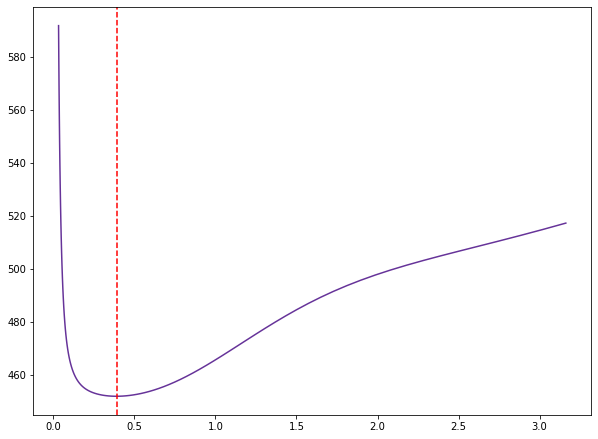

In [18]:
plt.figure(figsize=(10,7.5))
plt.plot(params.get('bandwidth'), -1*grid.cv_results_.get('mean_test_score'), color='RebeccaPurple')
plt.axvline(x=params.get('bandwidth')[index_best_band], color='red', linestyle='--')

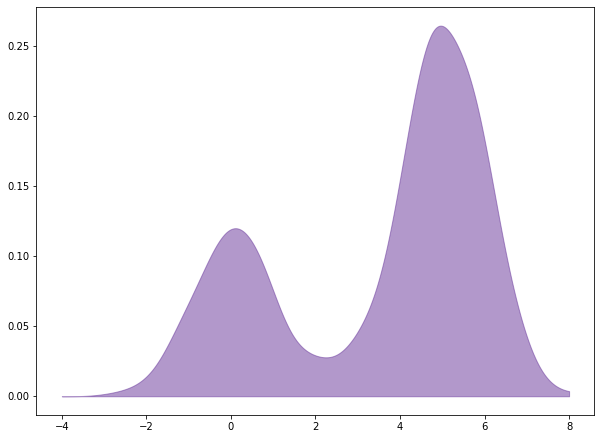

In [19]:
kernel(params.get('bandwidth')[index_best_band])

<AxesSubplot:ylabel='Count'>

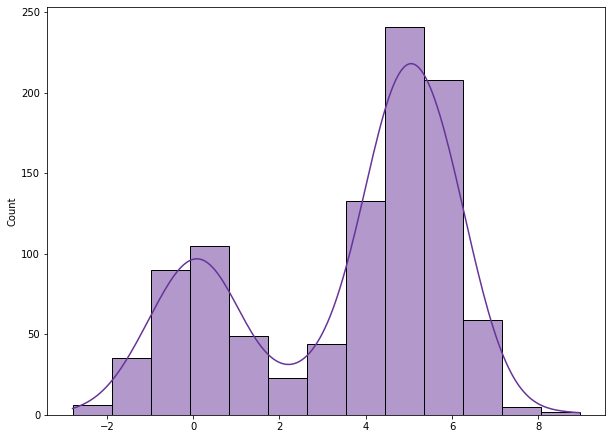

In [20]:
plt.figure(figsize=(10,7.5))
sns.histplot(x, color='RebeccaPurple', kde=True)

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


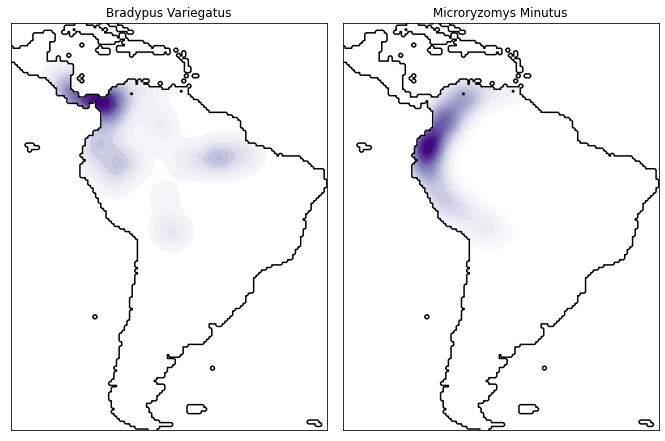

In [21]:
# sklearn example
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure(figsize=(10,7.5))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Purples)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()
